In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


In [48]:
# Load the data
df = pd.read_csv('anxiety_depression_data.csv')

In [49]:
df.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [50]:
# shape of the data
print(df.shape)

(1200, 21)


In [51]:
# Check for missing values
df.isnull().sum()


Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

In [52]:
# check the data types
df.dtypes


Age                                int64
Gender                            object
Education_Level                   object
Employment_Status                 object
Sleep_Hours                      float64
Physical_Activity_Hrs            float64
Social_Support_Score               int64
Anxiety_Score                      int64
Depression_Score                   int64
Stress_Level                       int64
Family_History_Mental_Illness      int64
Chronic_Illnesses                  int64
Medication_Use                    object
Therapy                            int64
Meditation                         int64
Substance_Use                     object
Financial_Stress                   int64
Work_Stress                        int64
Self_Esteem_Score                  int64
Life_Satisfaction_Score            int64
Loneliness_Score                   int64
dtype: object

In [53]:
# check for duplicates
df.duplicated().sum()

0

In [54]:
# drop columns with missing values
df.dropna(axis=1, inplace=True)

In [55]:
df.shape

(1200, 19)

In [56]:
df.isnull().sum()

Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Therapy                          0
Meditation                       0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64

In [57]:
# separate the numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()

In [58]:
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Therapy', 'Meditation', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score']
Categorical columns: ['Gender', 'Education_Level', 'Employment_Status']


In [59]:
# check the unique values in the categorical columns
for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female' 'Non-Binary' 'Other']
Education_Level: ["Bachelor's" "Master's" 'High School' 'Other' 'PhD']
Employment_Status: ['Unemployed' 'Retired' 'Employed' 'Student']


In [60]:
# describe the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,46.317500,16.451157,18.0,33.0,46.0,61.0,74.0
Sleep_Hours,1200.0,6.469000,1.529550,2.0,5.4,6.4,7.5,12.4
Physical_Activity_Hrs,1200.0,2.005750,2.037818,0.0,0.6,1.4,2.7,15.1
Social_Support_Score,1200.0,5.055000,2.652893,1.0,3.0,5.0,7.0,9.0
Anxiety_Score,1200.0,10.470000,5.911138,1.0,5.0,10.5,16.0,20.0
Depression_Score,1200.0,10.674167,5.632889,1.0,6.0,11.0,15.0,20.0
Stress_Level,1200.0,5.000833,2.538281,1.0,3.0,5.0,7.0,9.0
Family_History_Mental_Illness,1200.0,0.318333,0.466024,0.0,0.0,0.0,1.0,1.0
Chronic_Illnesses,1200.0,0.267500,0.442840,0.0,0.0,0.0,1.0,1.0
Therapy,1200.0,0.210000,0.407478,0.0,0.0,0.0,0.0,1.0


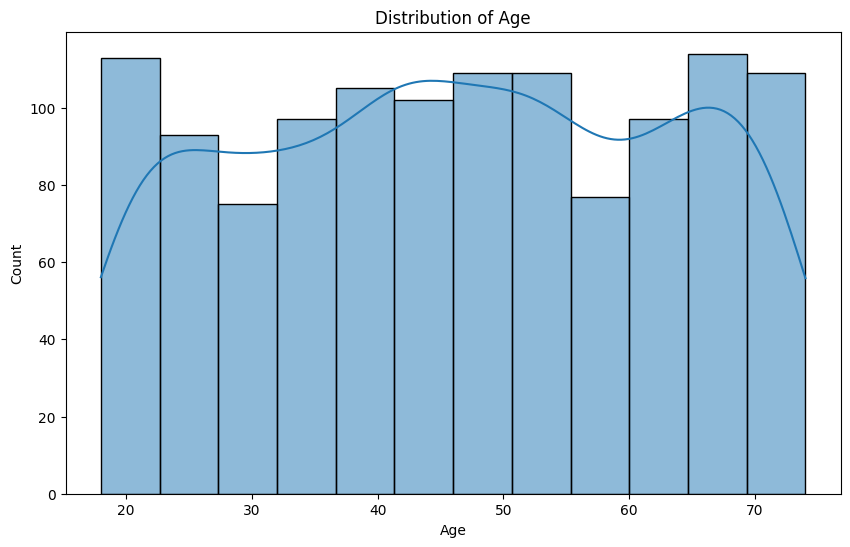

In [61]:
# distrbution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

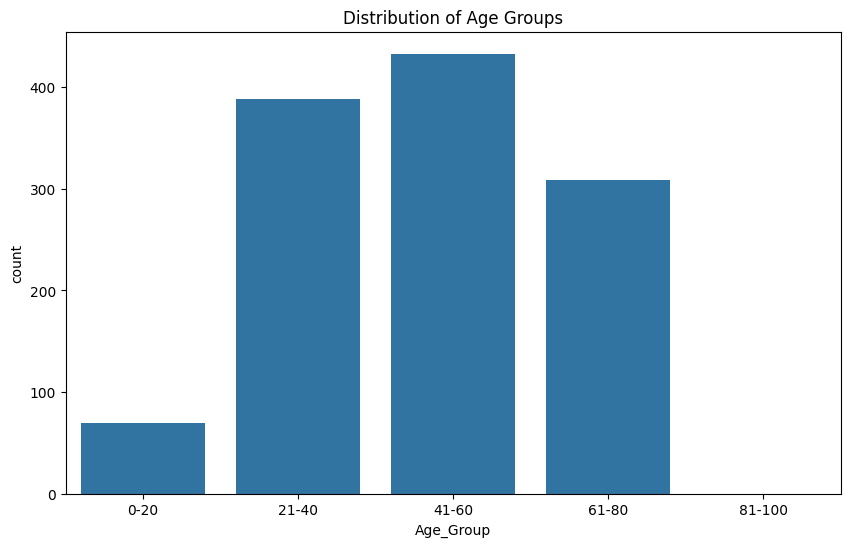

In [62]:
# split age into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
# plot the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df)
plt.title('Distribution of Age Groups')
plt.show()

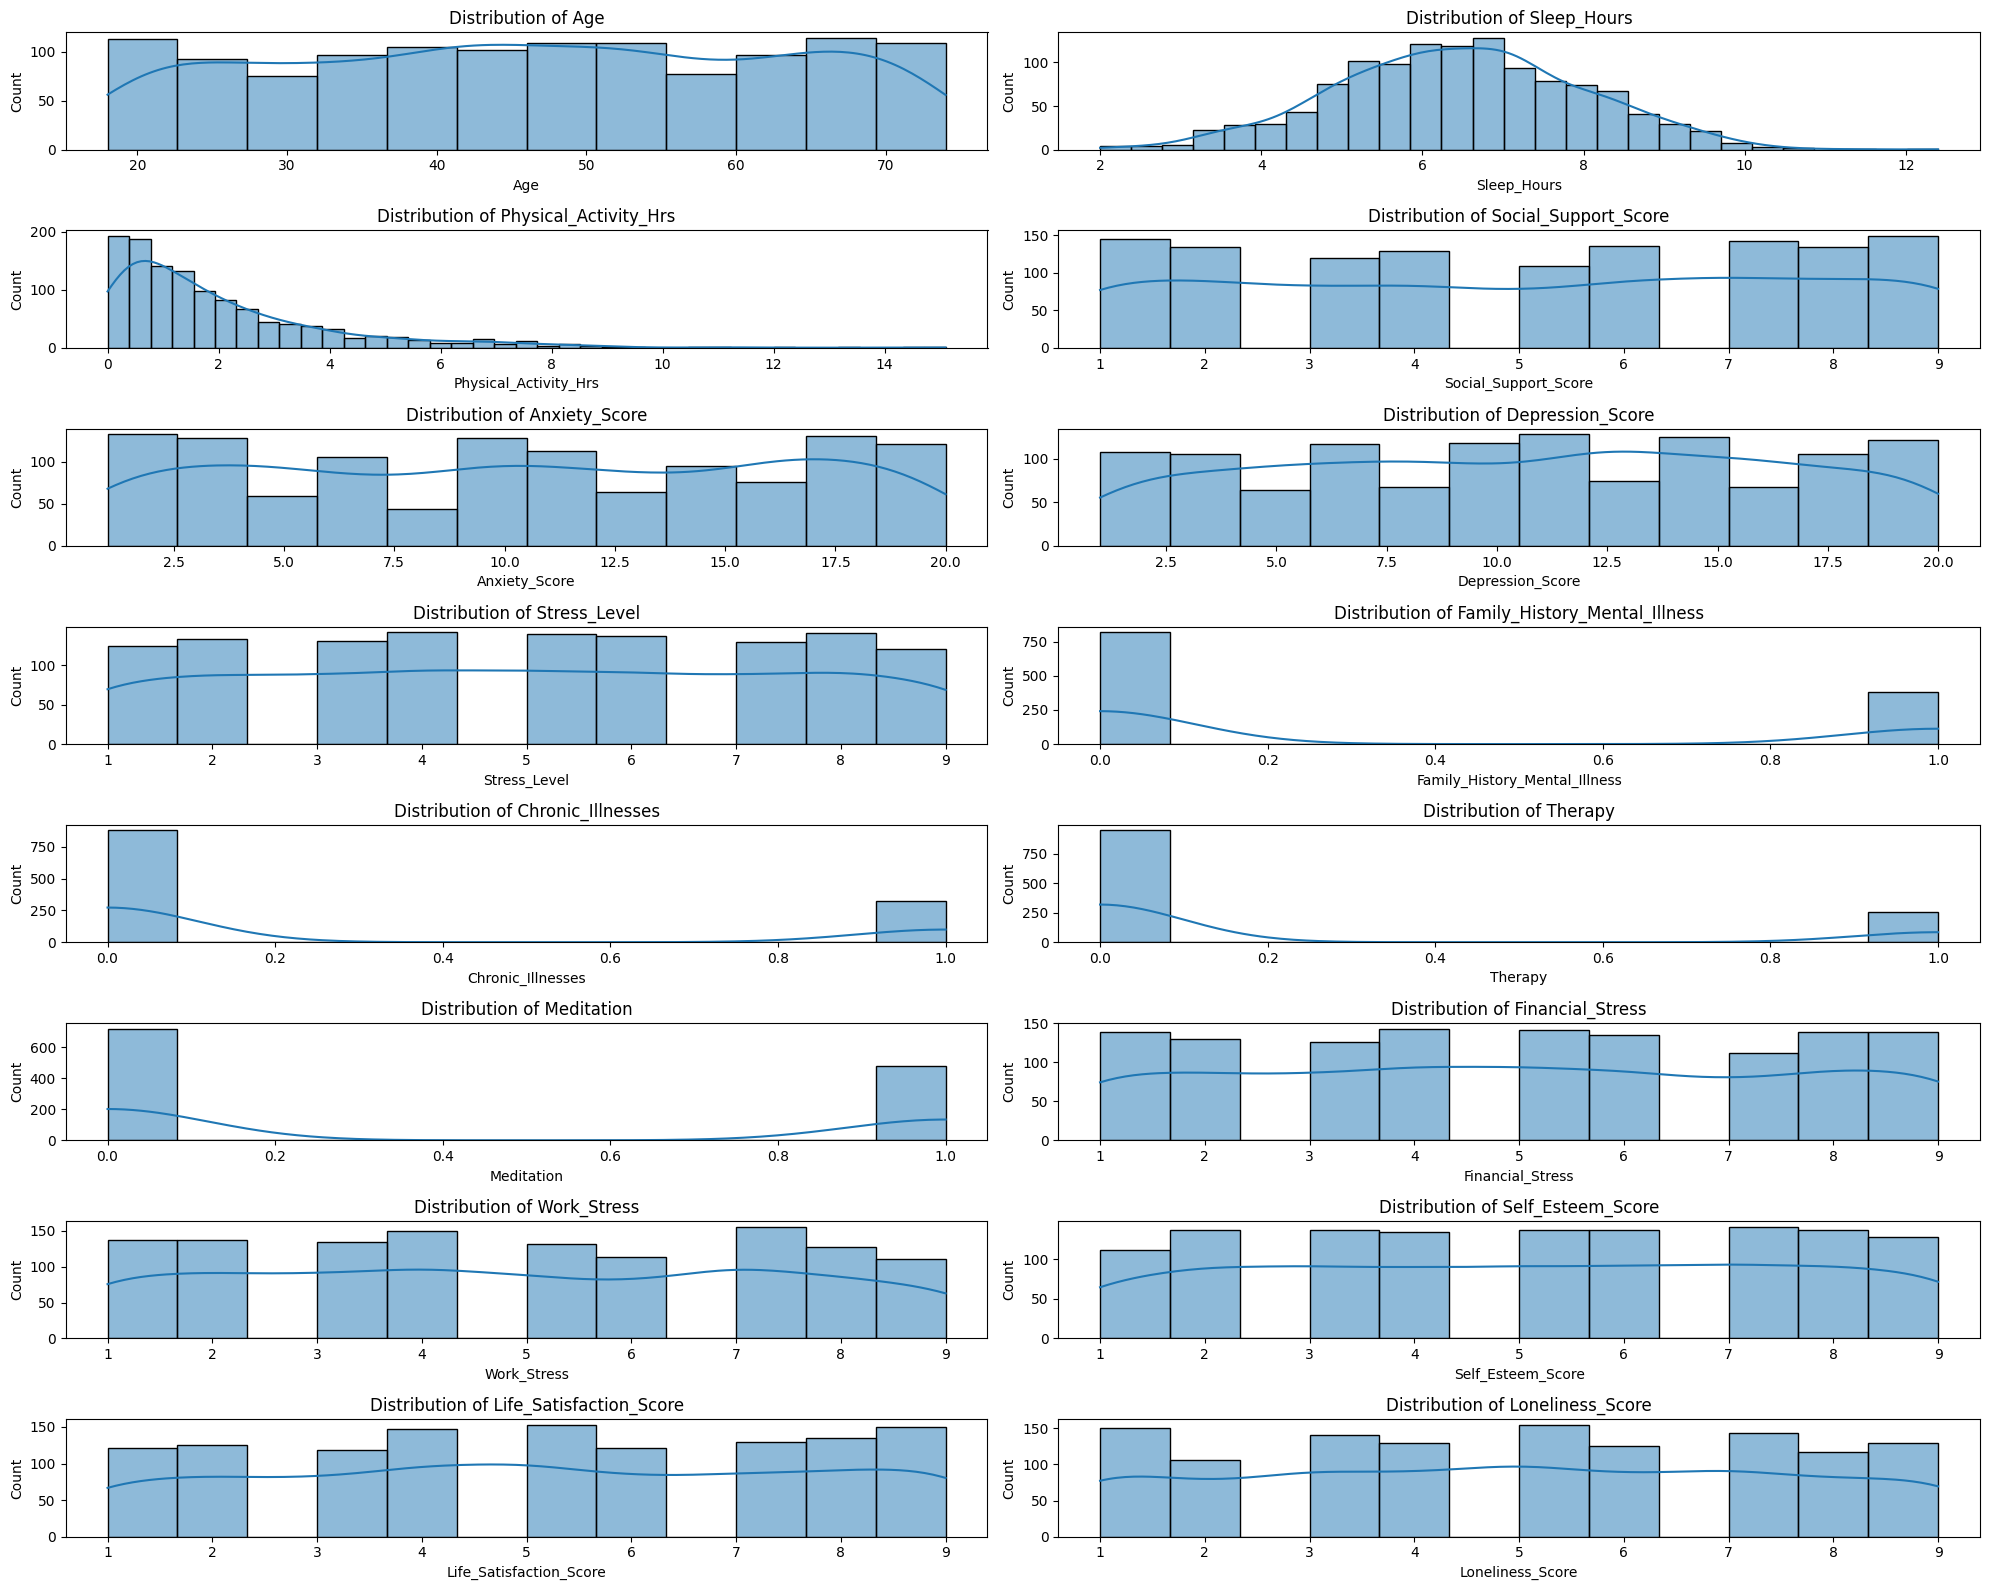

In [63]:
# plot the distributions of the numerical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(8, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


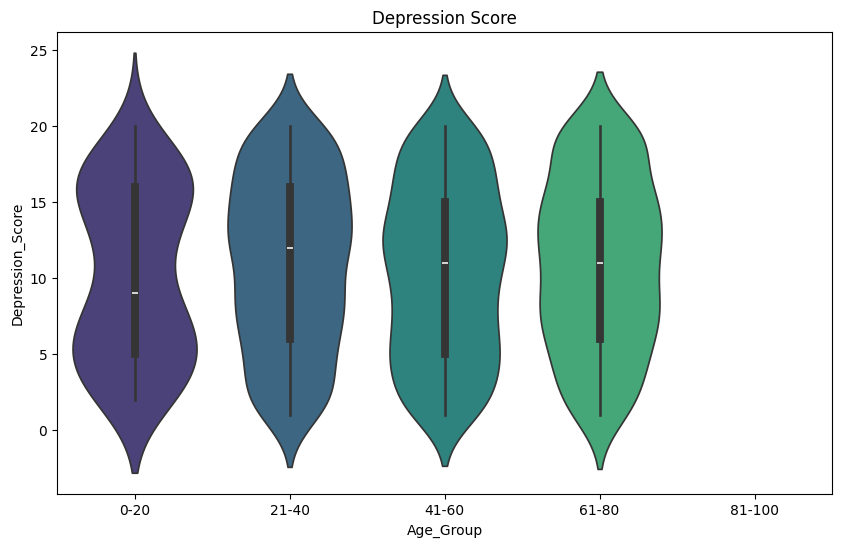

In [64]:
# plot Anxiety_Score and Depression_Score as a function of AgeGroup
plt.figure(figsize=(10, 6))
sns.violinplot(y='Depression_Score', x='Age_Group', data=df,palette='viridis')
plt.title('Depression Score')
plt.show()

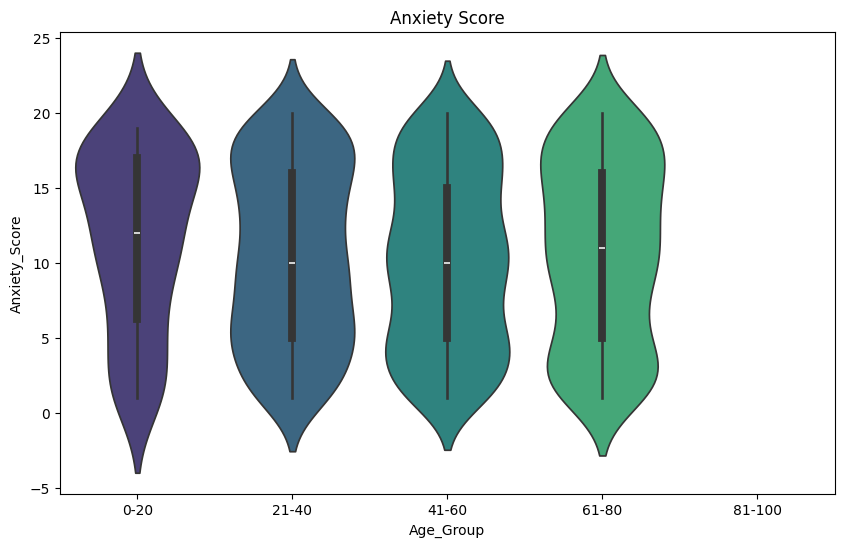

In [65]:
# plot Anxiety_Score and Depression_Score as a function of AgeGroup
plt.figure(figsize=(10, 6))
sns.violinplot(y='Anxiety_Score', x='Age_Group', data=df,palette='viridis')
plt.title('Anxiety Score')
plt.show()

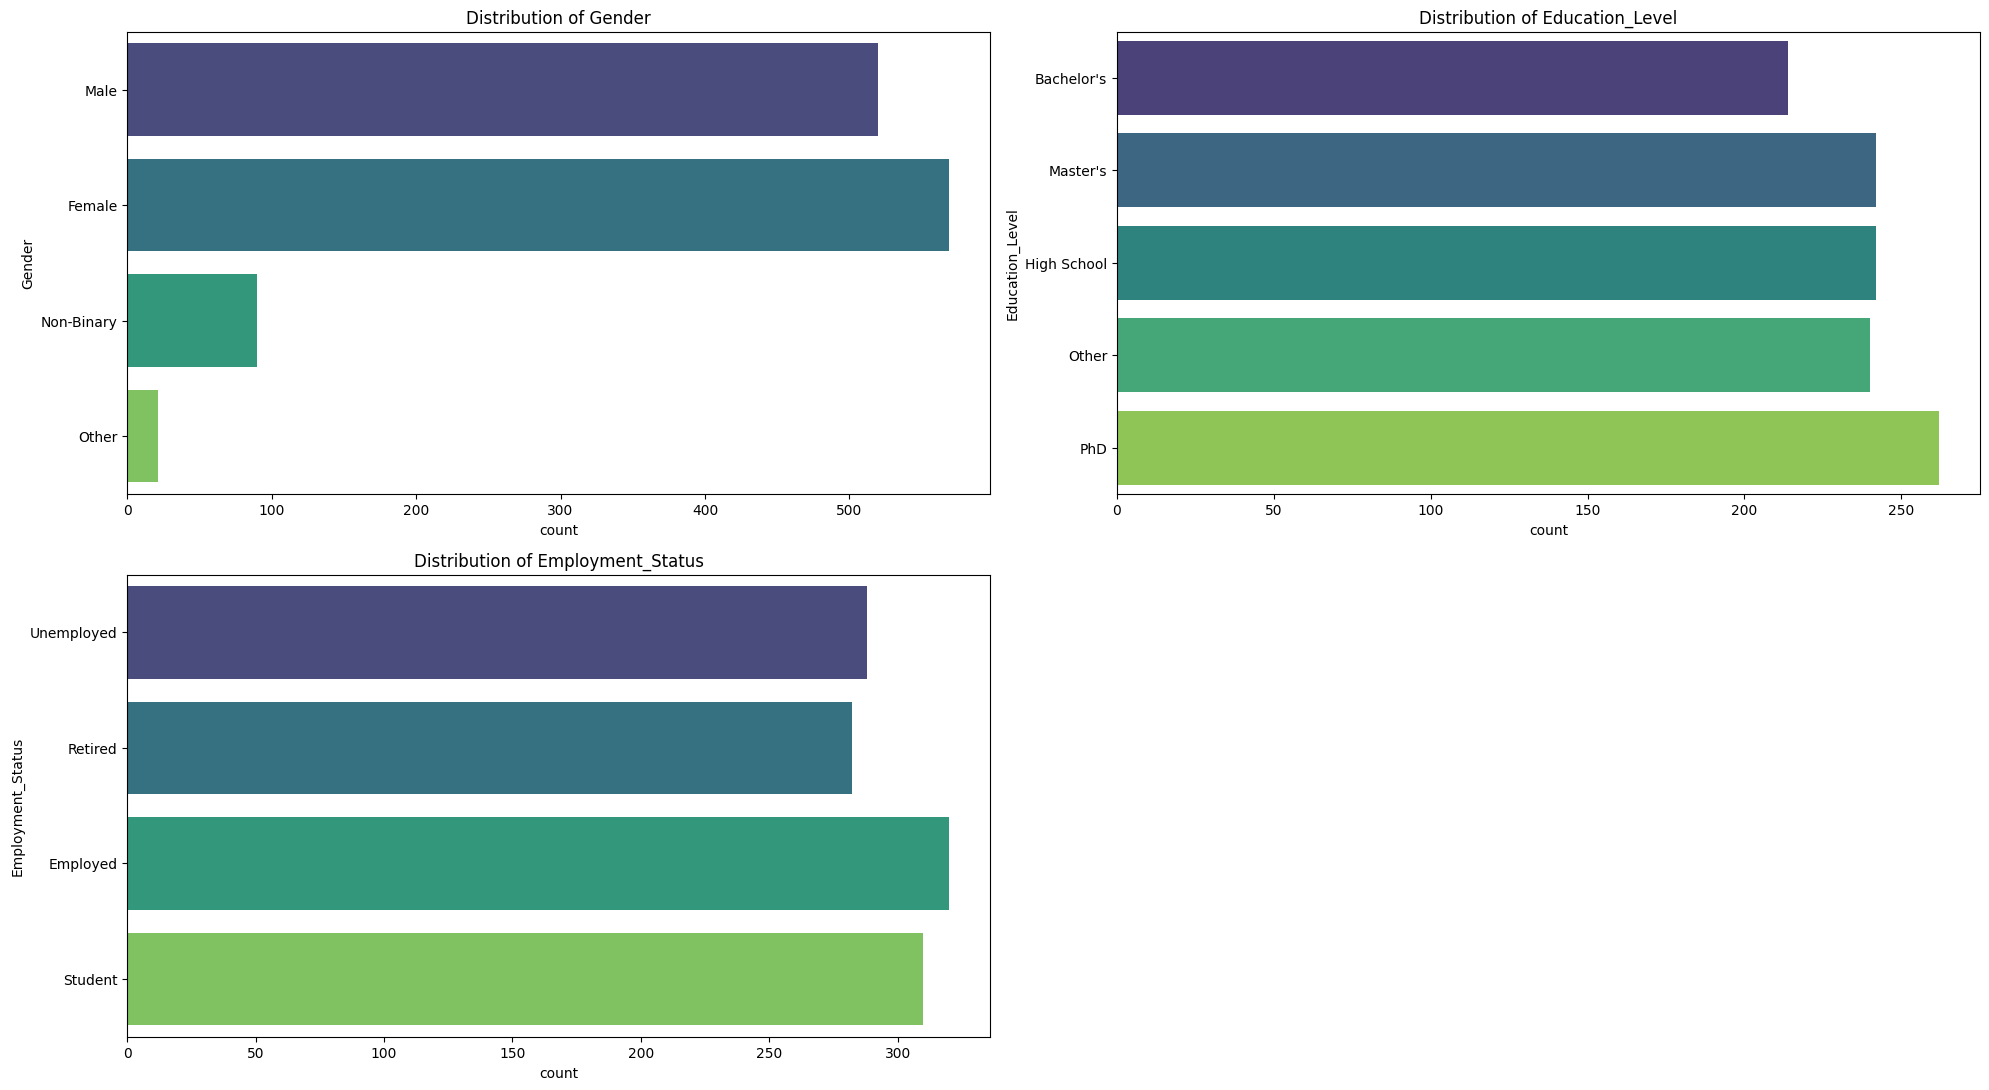

In [66]:
# plot the distributions of the categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(df[col],palette='viridis')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

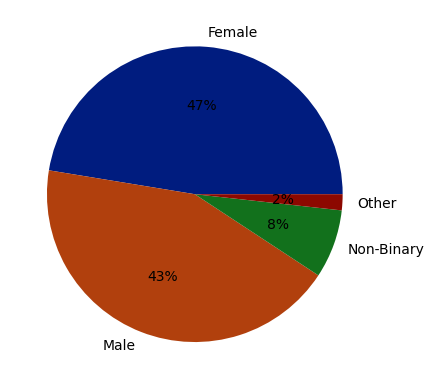

In [ ]:
# declaring exploding pie 
explode = [0, 0.1, 0, 0, 0] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('dark') 
  
# plotting data on chart 
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index, 
        colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

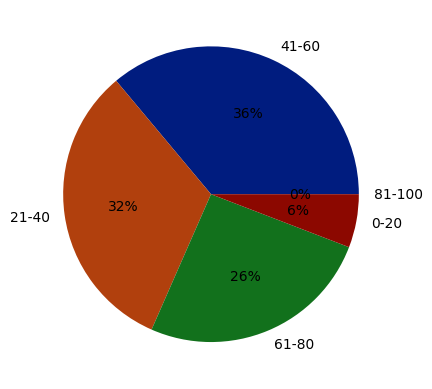

In [ ]:
# declaring exploding pie 
explode = [0, 0.1, 0, 0, 0] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('dark') 
  
# plotting data on chart 

plt.pie(df['Age_Group'].value_counts(),labels=df['Age_Group'].value_counts().index, 
        colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

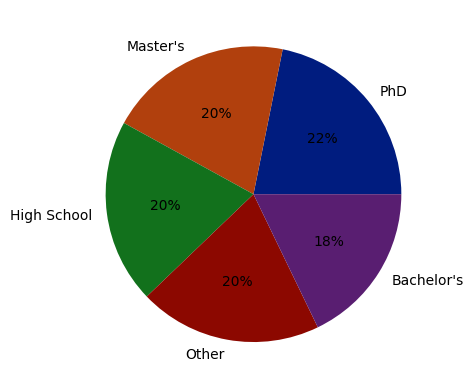

In [85]:
# declaring exploding pie 
explode = [0, 0.1, 0, 0, 0] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('dark') 
  
# plotting data on chart 

plt.pie(df['Education_Level'].value_counts(),labels=df['Education_Level'].value_counts().index, 
        colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

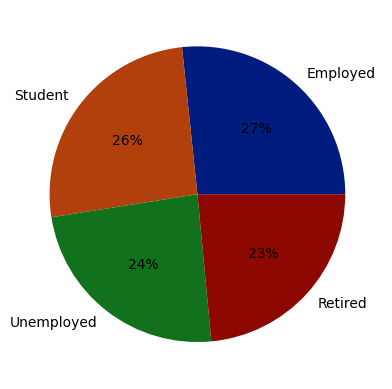

In [86]:
# declaring exploding pie 
explode = [0, 0.1, 0, 0, 0] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('dark') 
  
# plotting data on chart 

plt.pie(df['Employment_Status'].value_counts(),labels=df['Employment_Status'].value_counts().index, 
        colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

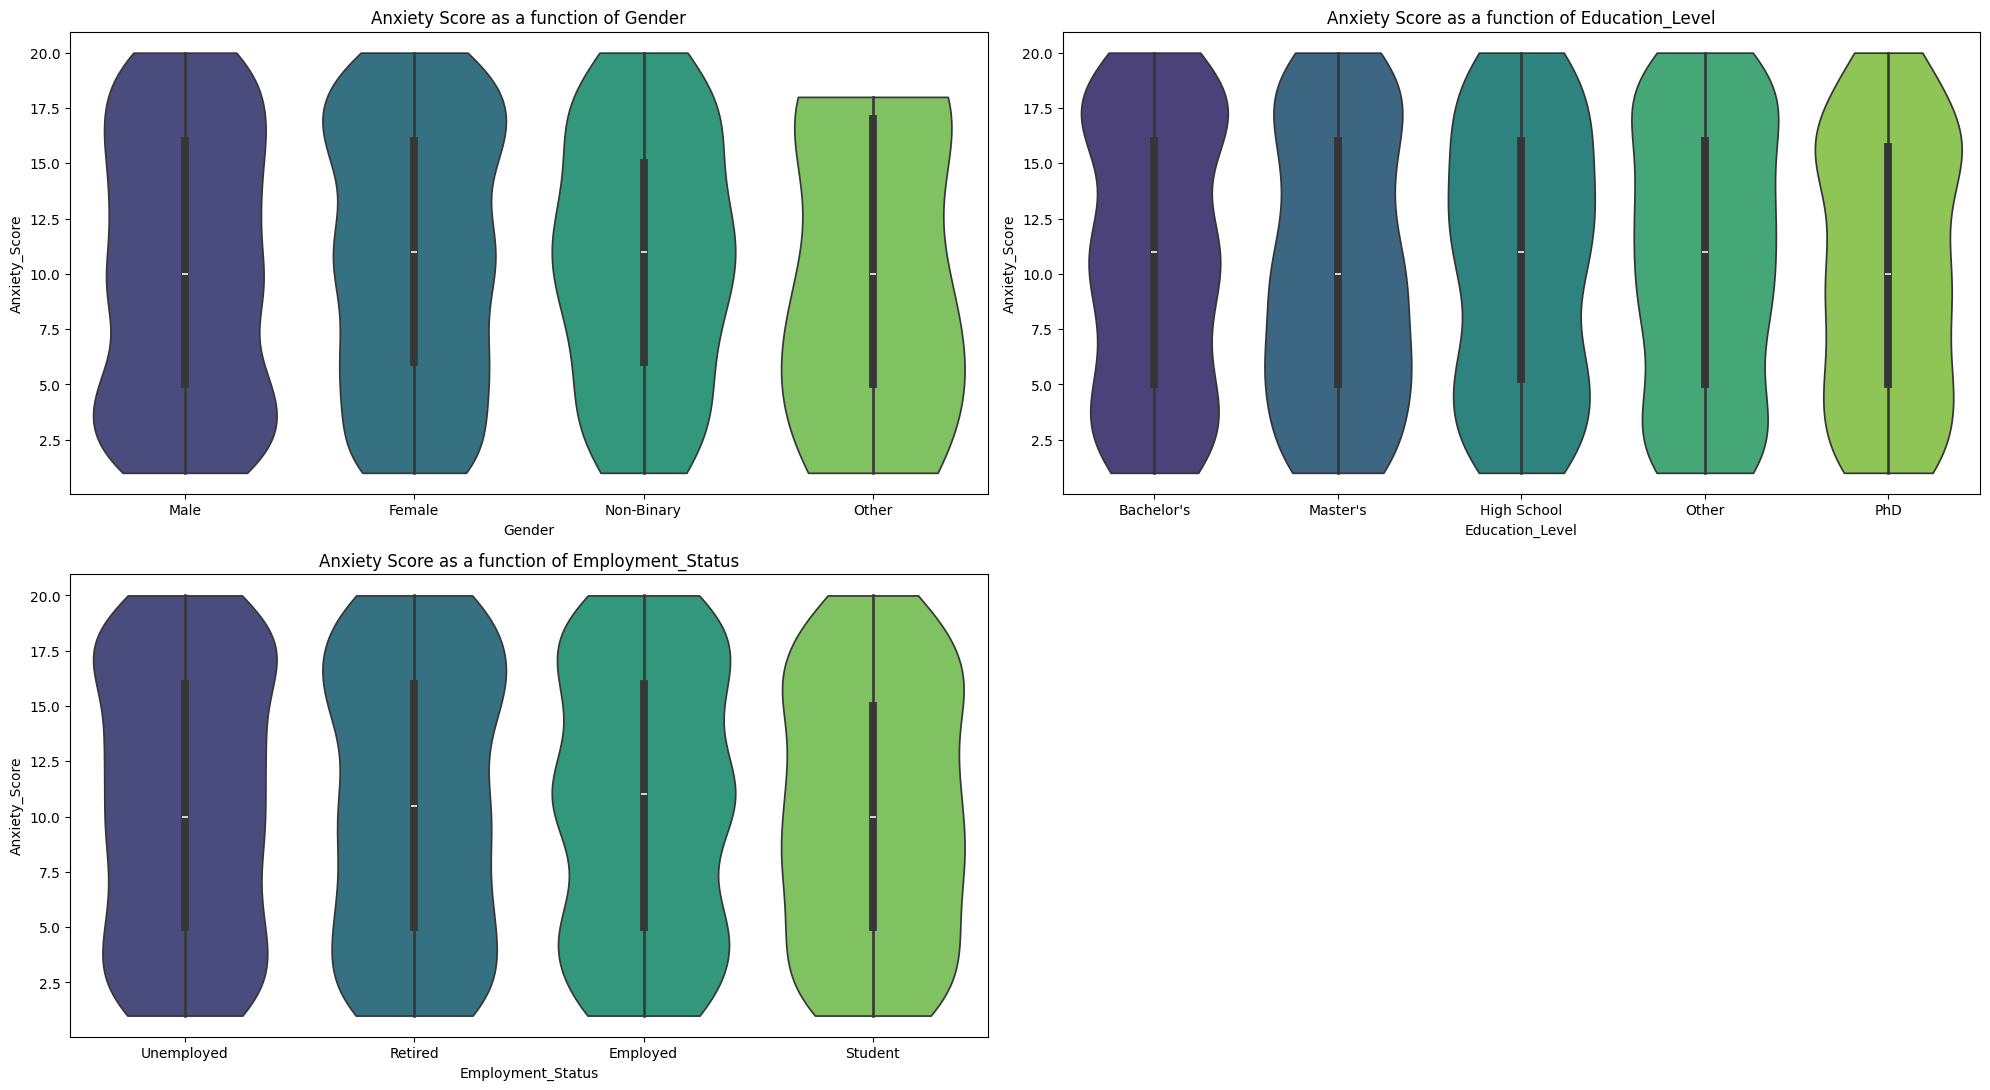

In [67]:
# plot anxiety score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=col, y='Anxiety_Score', data=df,cut=0,palette='viridis')
    plt.title(f'Anxiety Score as a function of {col}')
plt.tight_layout()
plt.show()

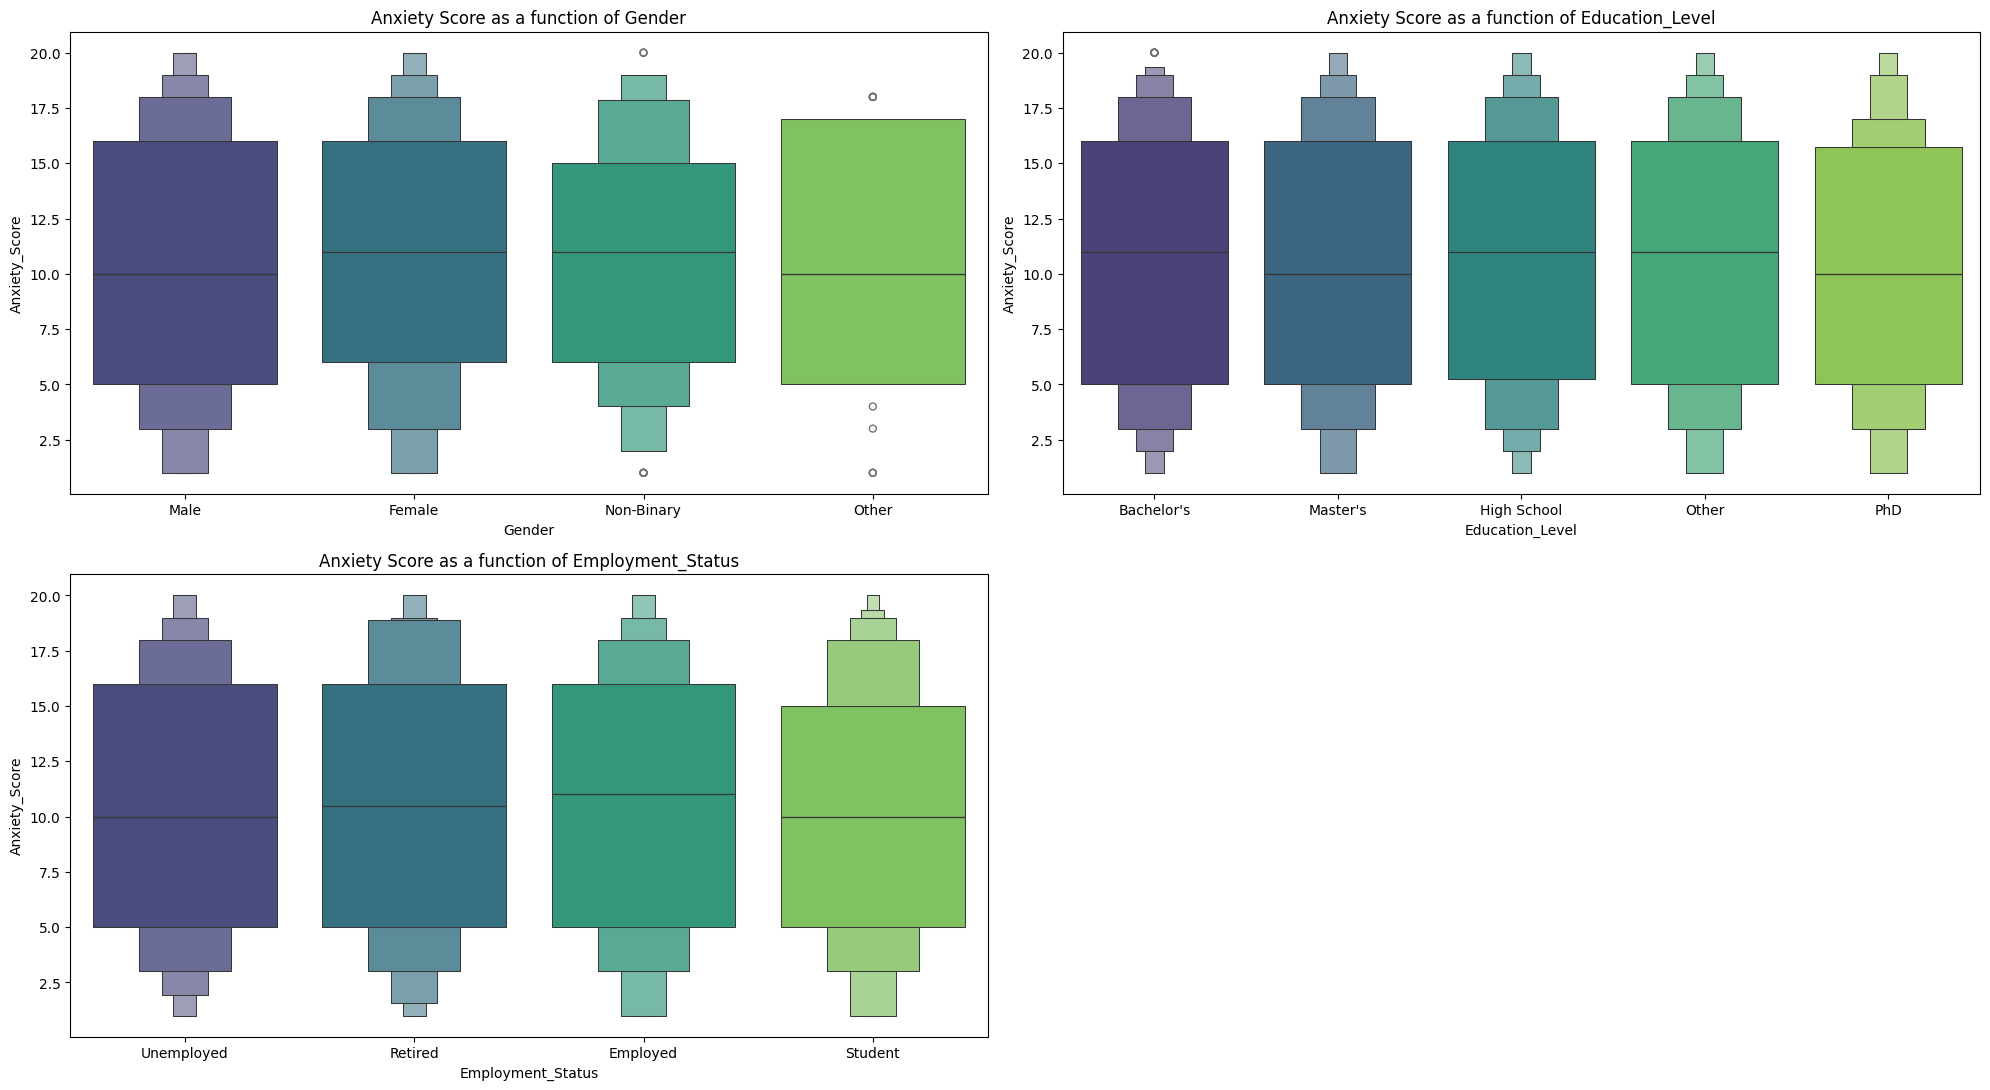

In [68]:
# plot anxiety score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxenplot(x=col, y='Anxiety_Score', data=df,palette='viridis')
    plt.title(f'Anxiety Score as a function of {col}')
plt.tight_layout()
plt.show()

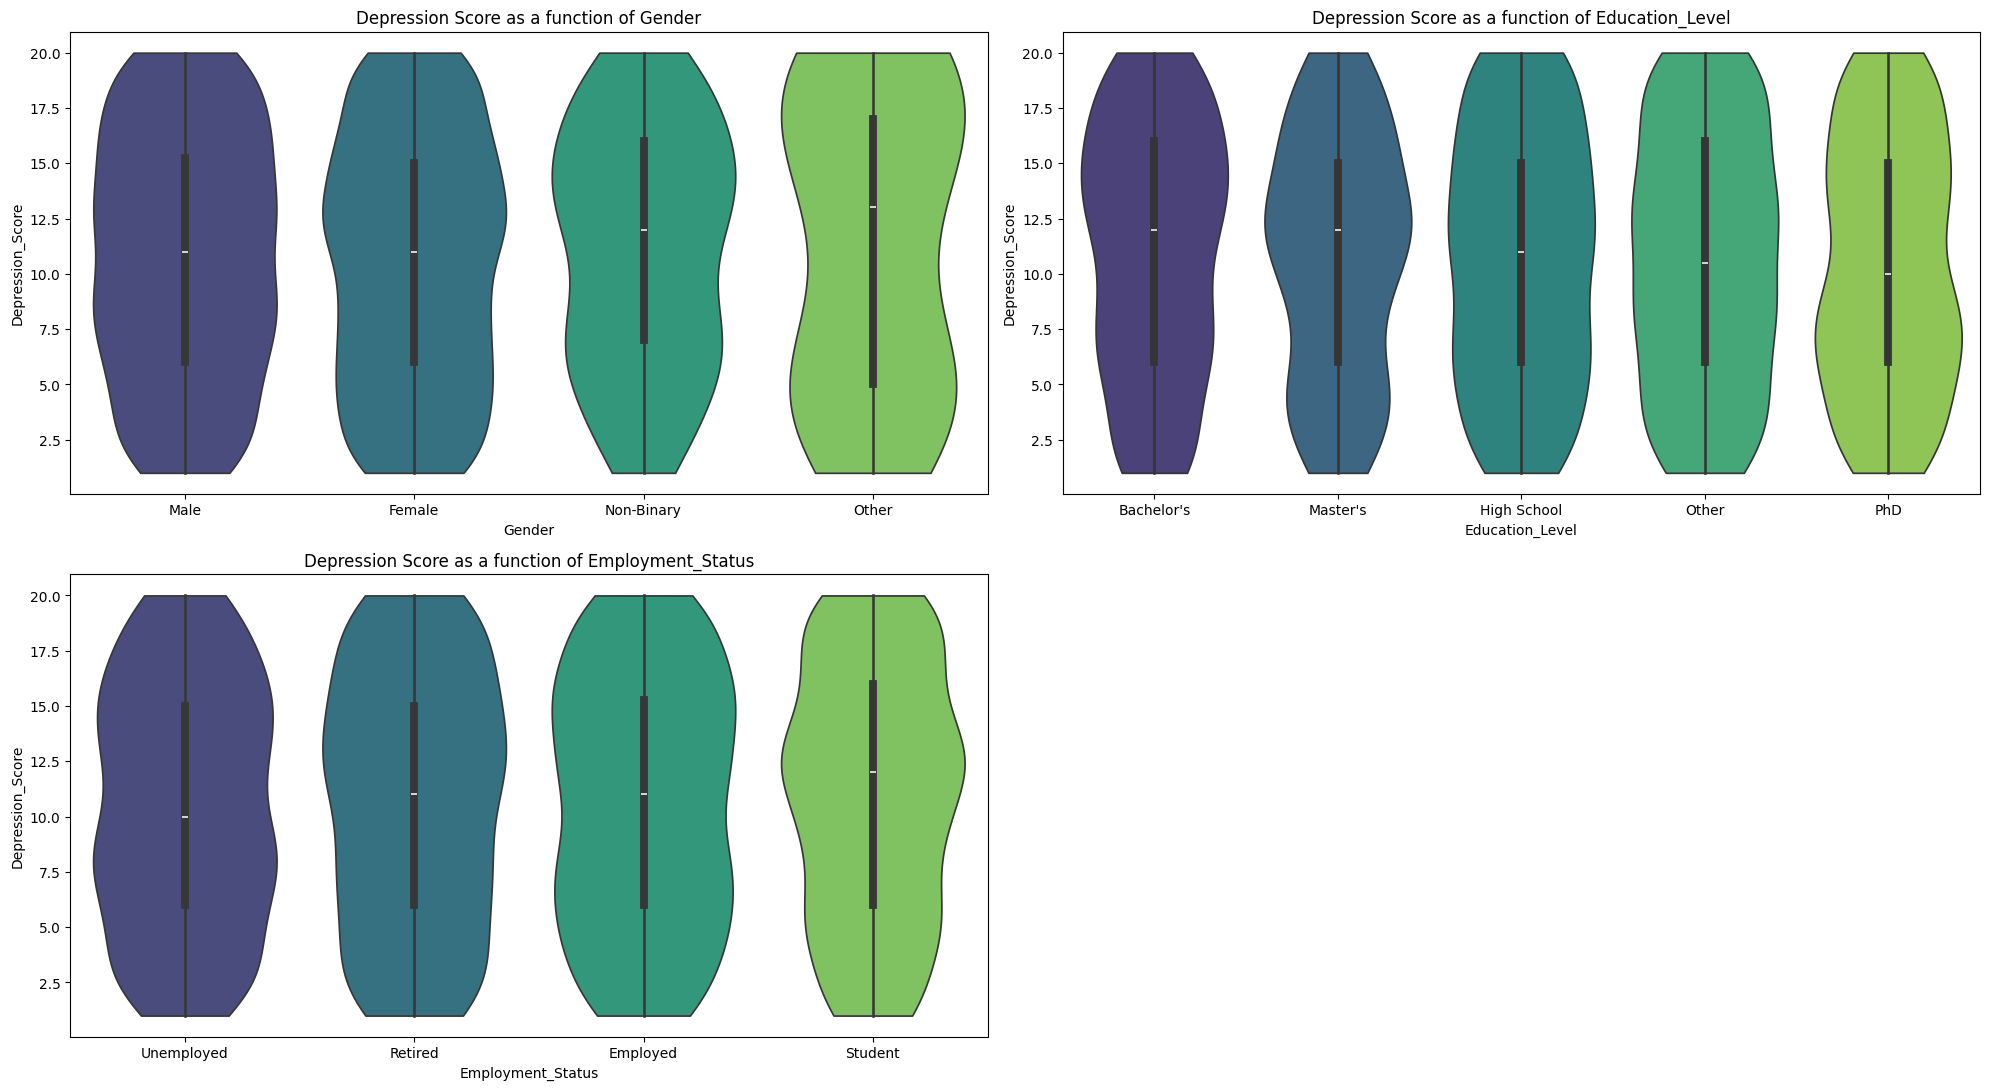

In [69]:
# plot depression score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=col, y='Depression_Score', data=df,cut=0,palette='viridis')
    plt.title(f'Depression Score as a function of {col}')
plt.tight_layout()
plt.show()

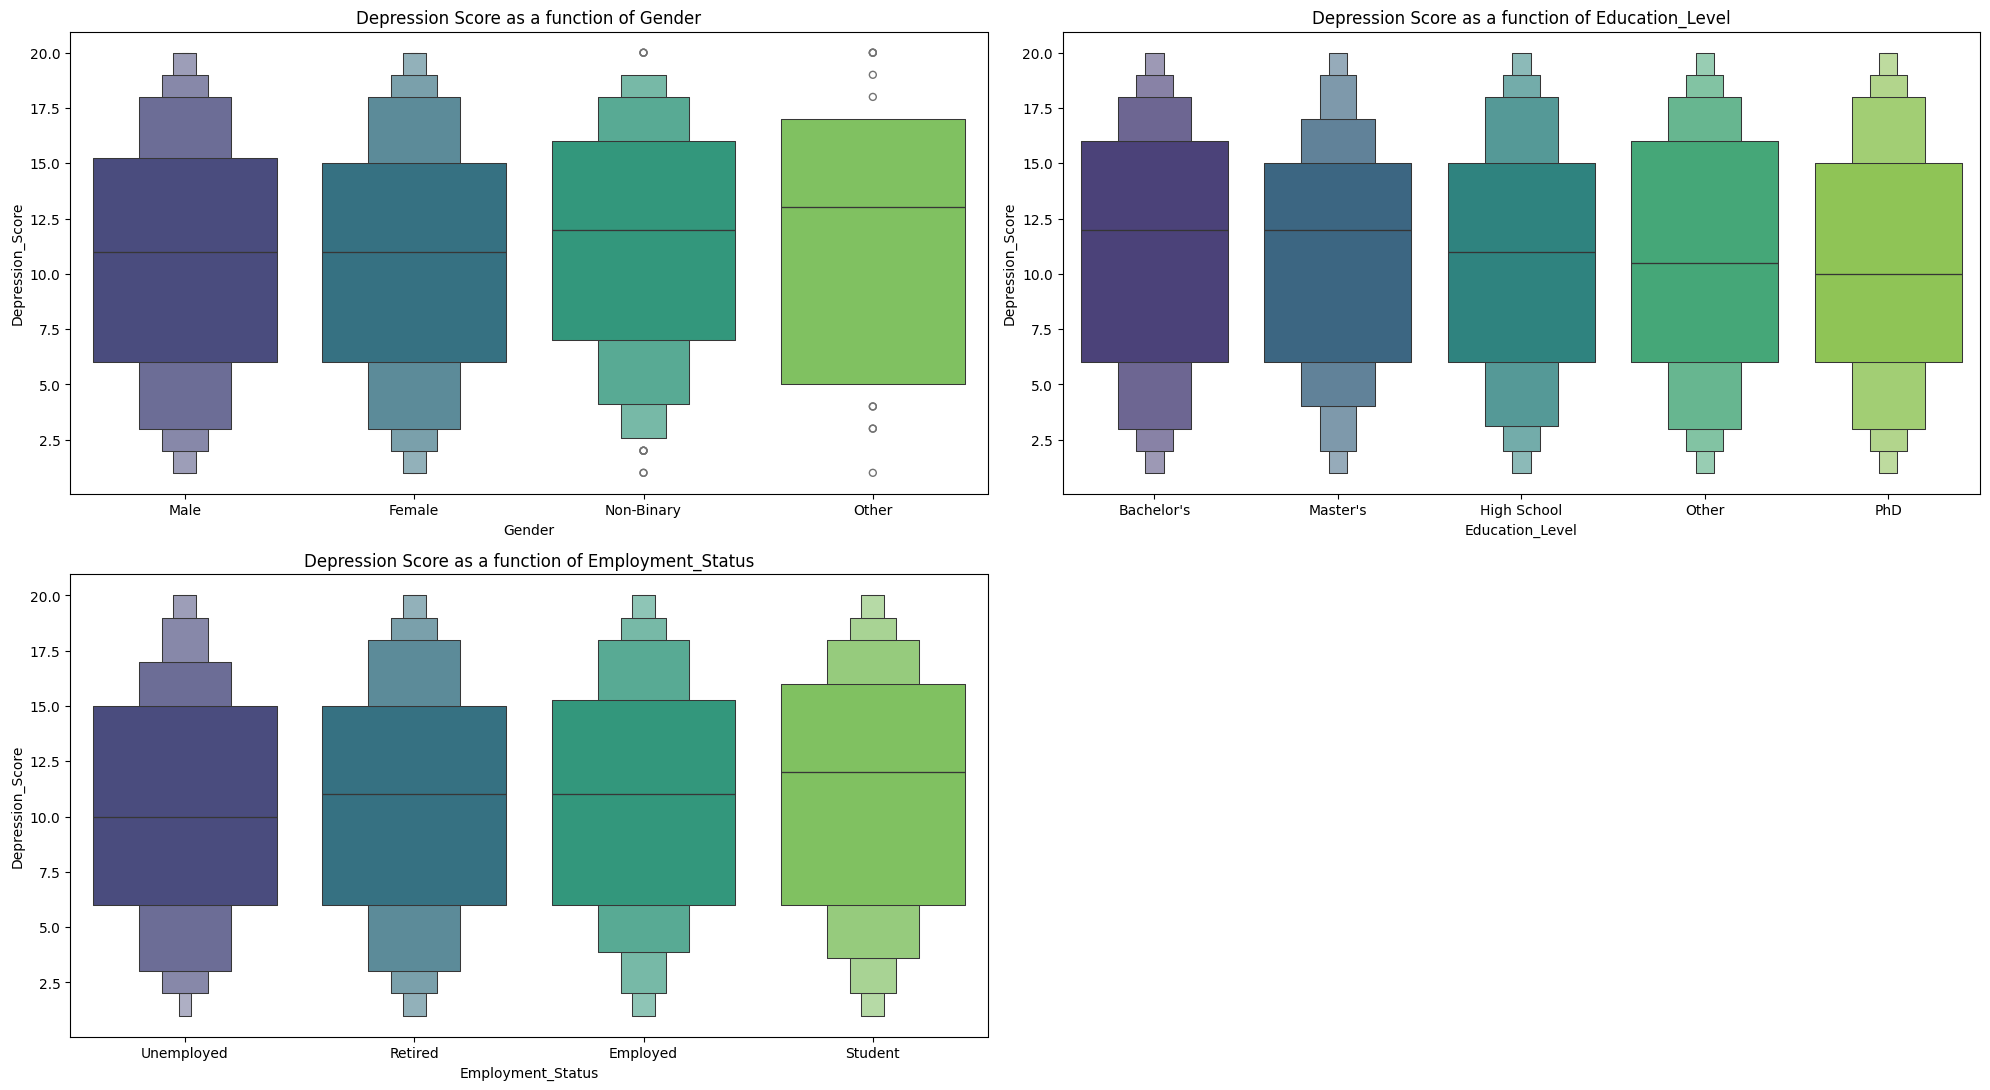

In [70]:
# plot depression score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxenplot(x=col, y='Depression_Score', data=df,palette='viridis')
    plt.title(f'Depression Score as a function of {col}')
plt.tight_layout()
plt.show()

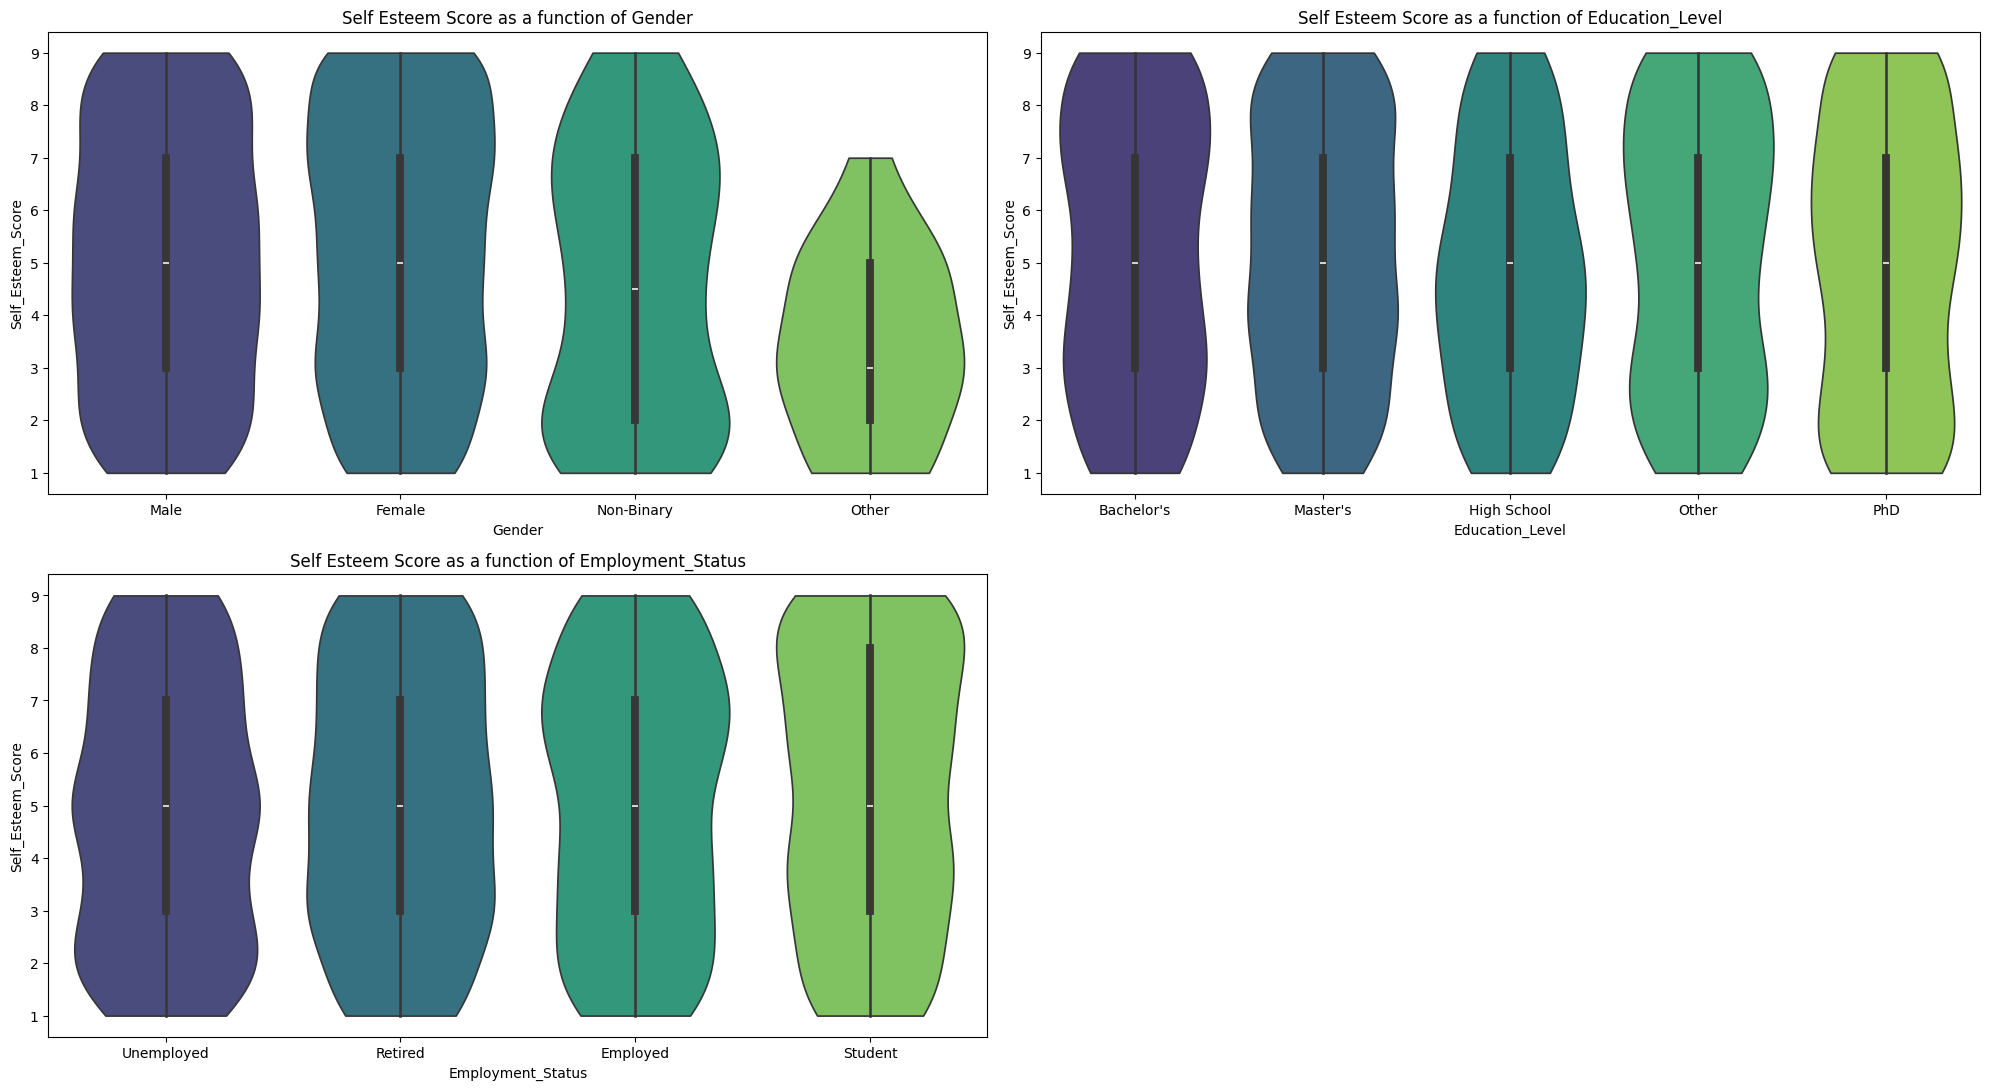

In [71]:
# plot self esteem score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=col, y='Self_Esteem_Score', data=df,cut=0,palette='viridis')
    plt.title(f'Self Esteem Score as a function of {col}')
plt.tight_layout()
plt.show()

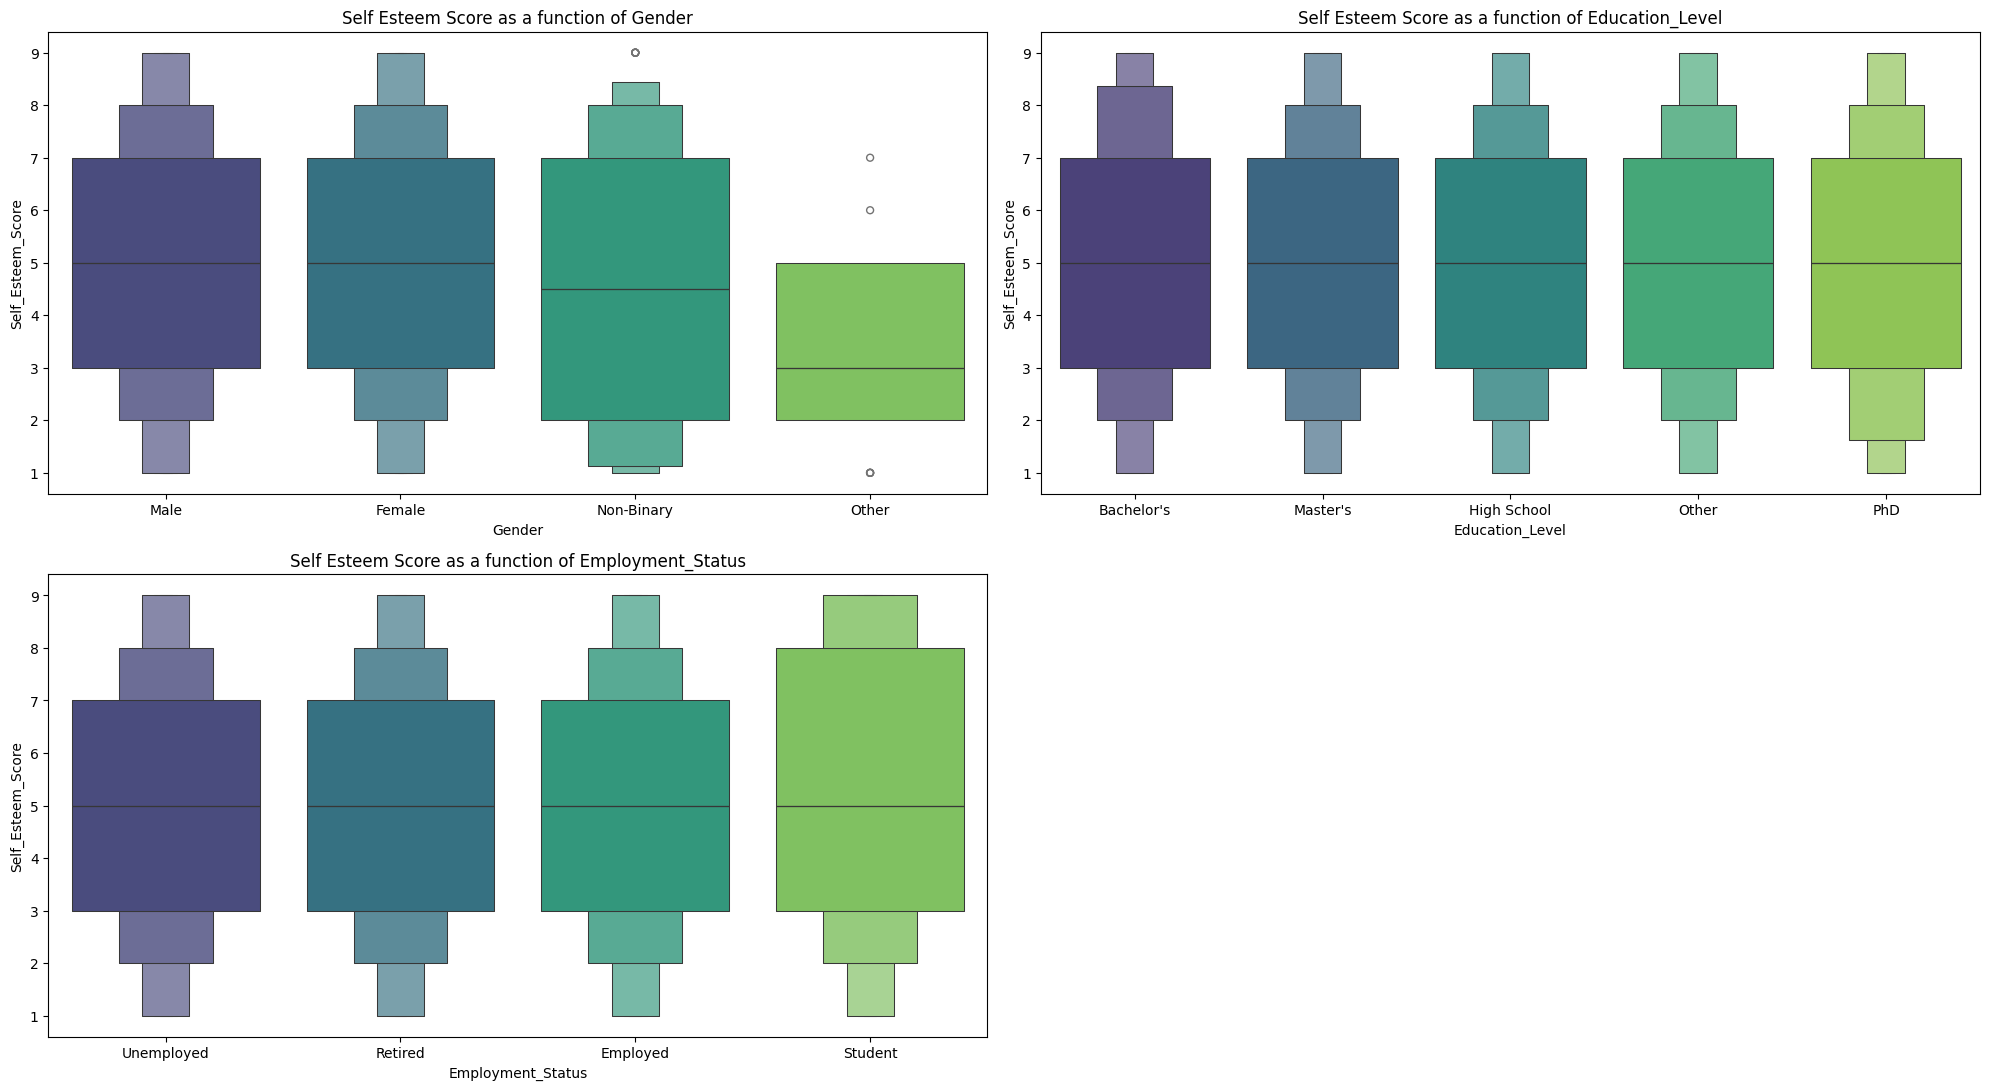

In [72]:
# plot self esteem score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxenplot(x=col, y='Self_Esteem_Score', data=df,palette='viridis')
    plt.title(f'Self Esteem Score as a function of {col}')
plt.tight_layout()
plt.show()

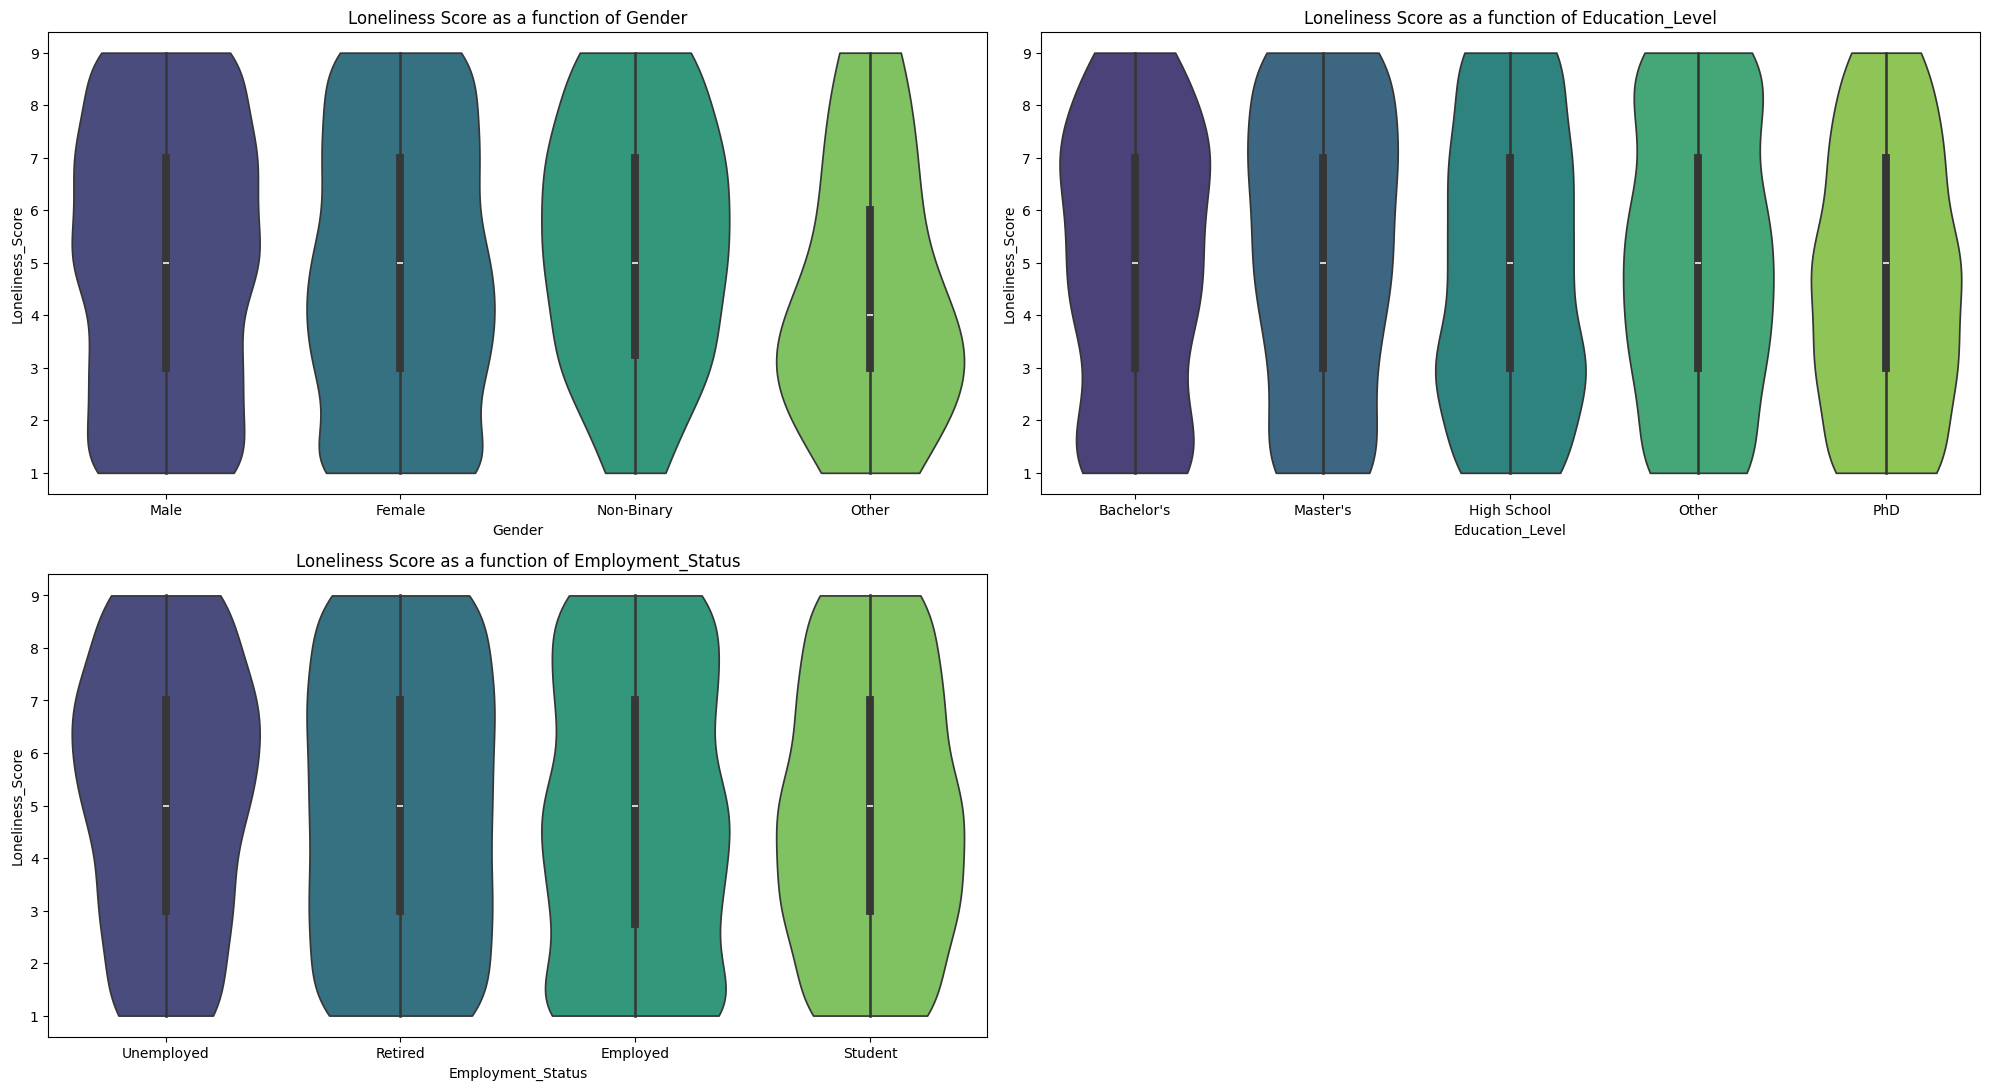

In [73]:
# plot Loneliness score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=col, y='Loneliness_Score', data=df,cut=0,palette='viridis')
    plt.title(f'Loneliness Score as a function of {col}')
plt.tight_layout()
plt.show()

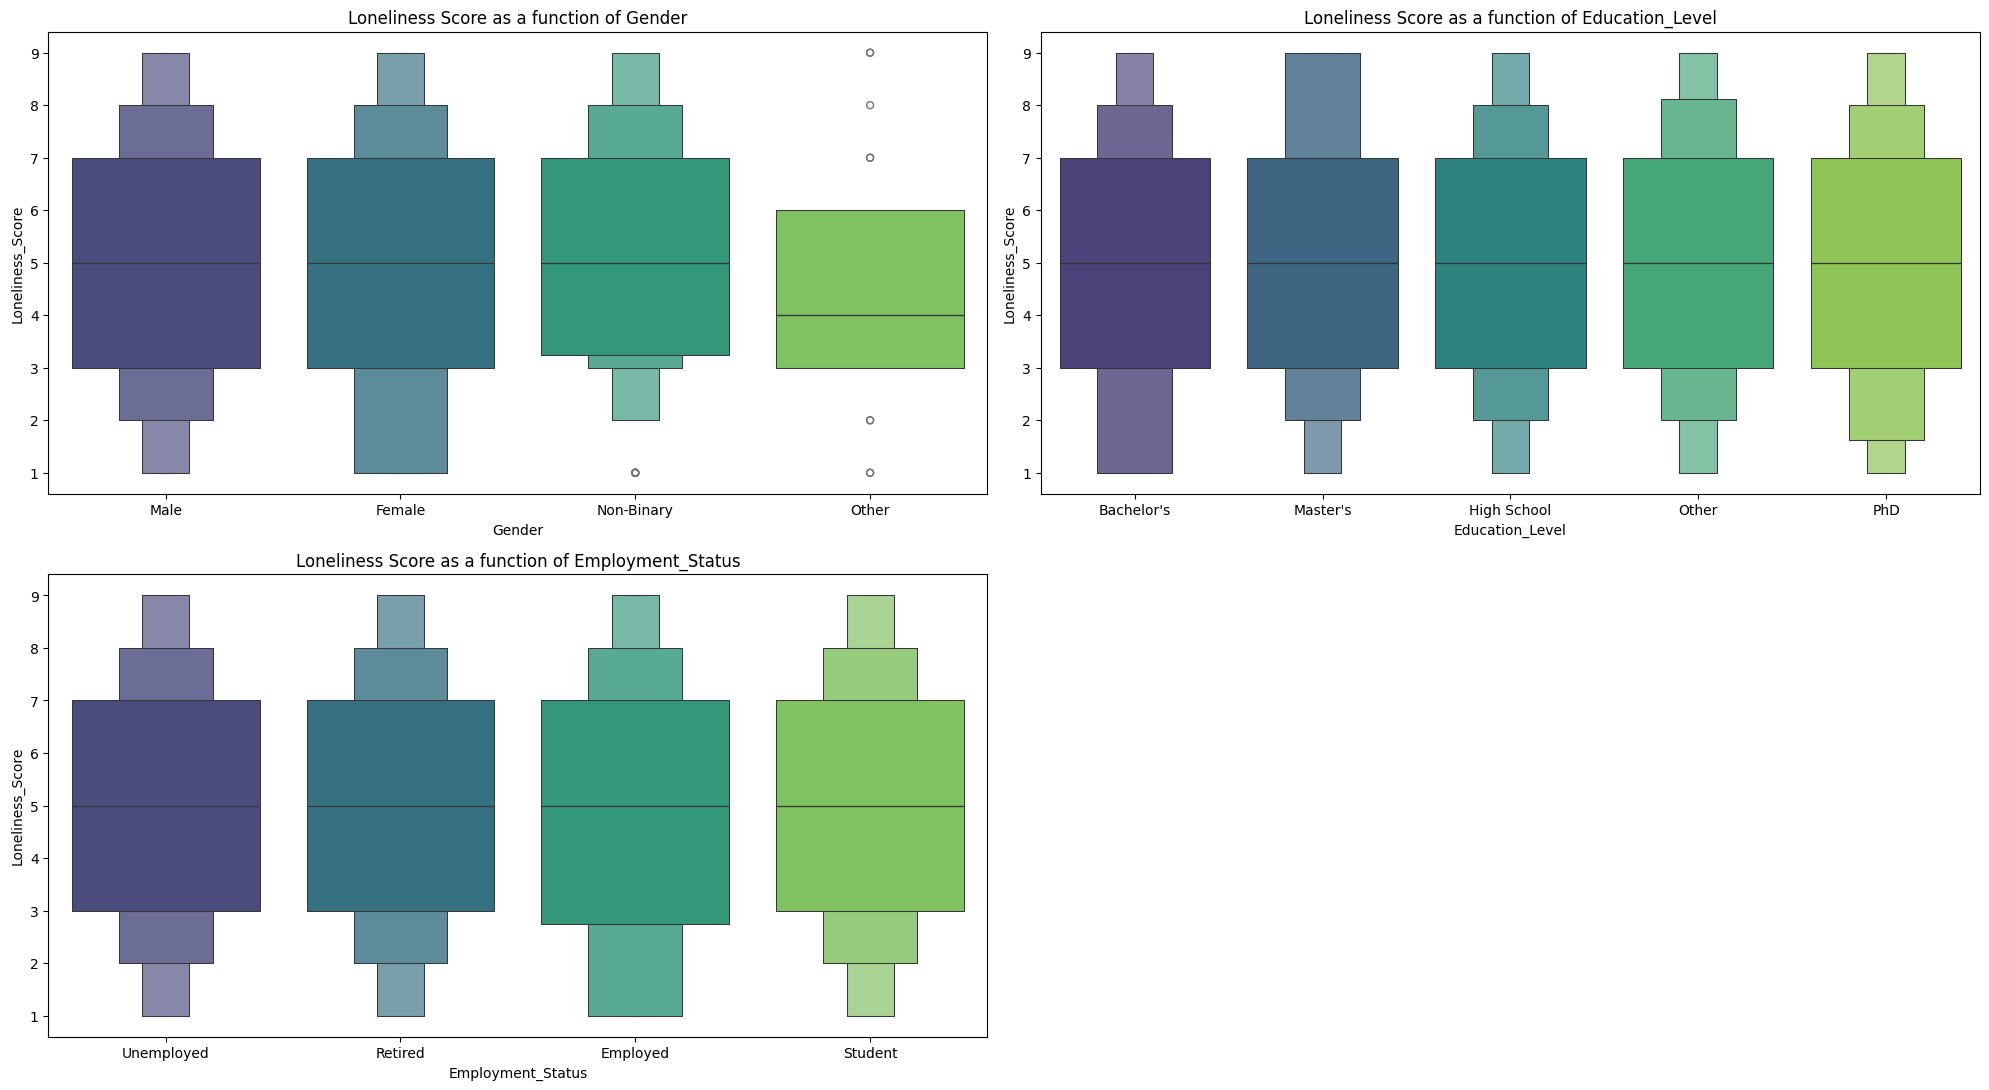

In [74]:
# plot Loneliness score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxenplot(x=col, y='Loneliness_Score', data=df,palette='viridis')
    plt.title(f'Loneliness Score as a function of {col}')
plt.tight_layout()
plt.show()

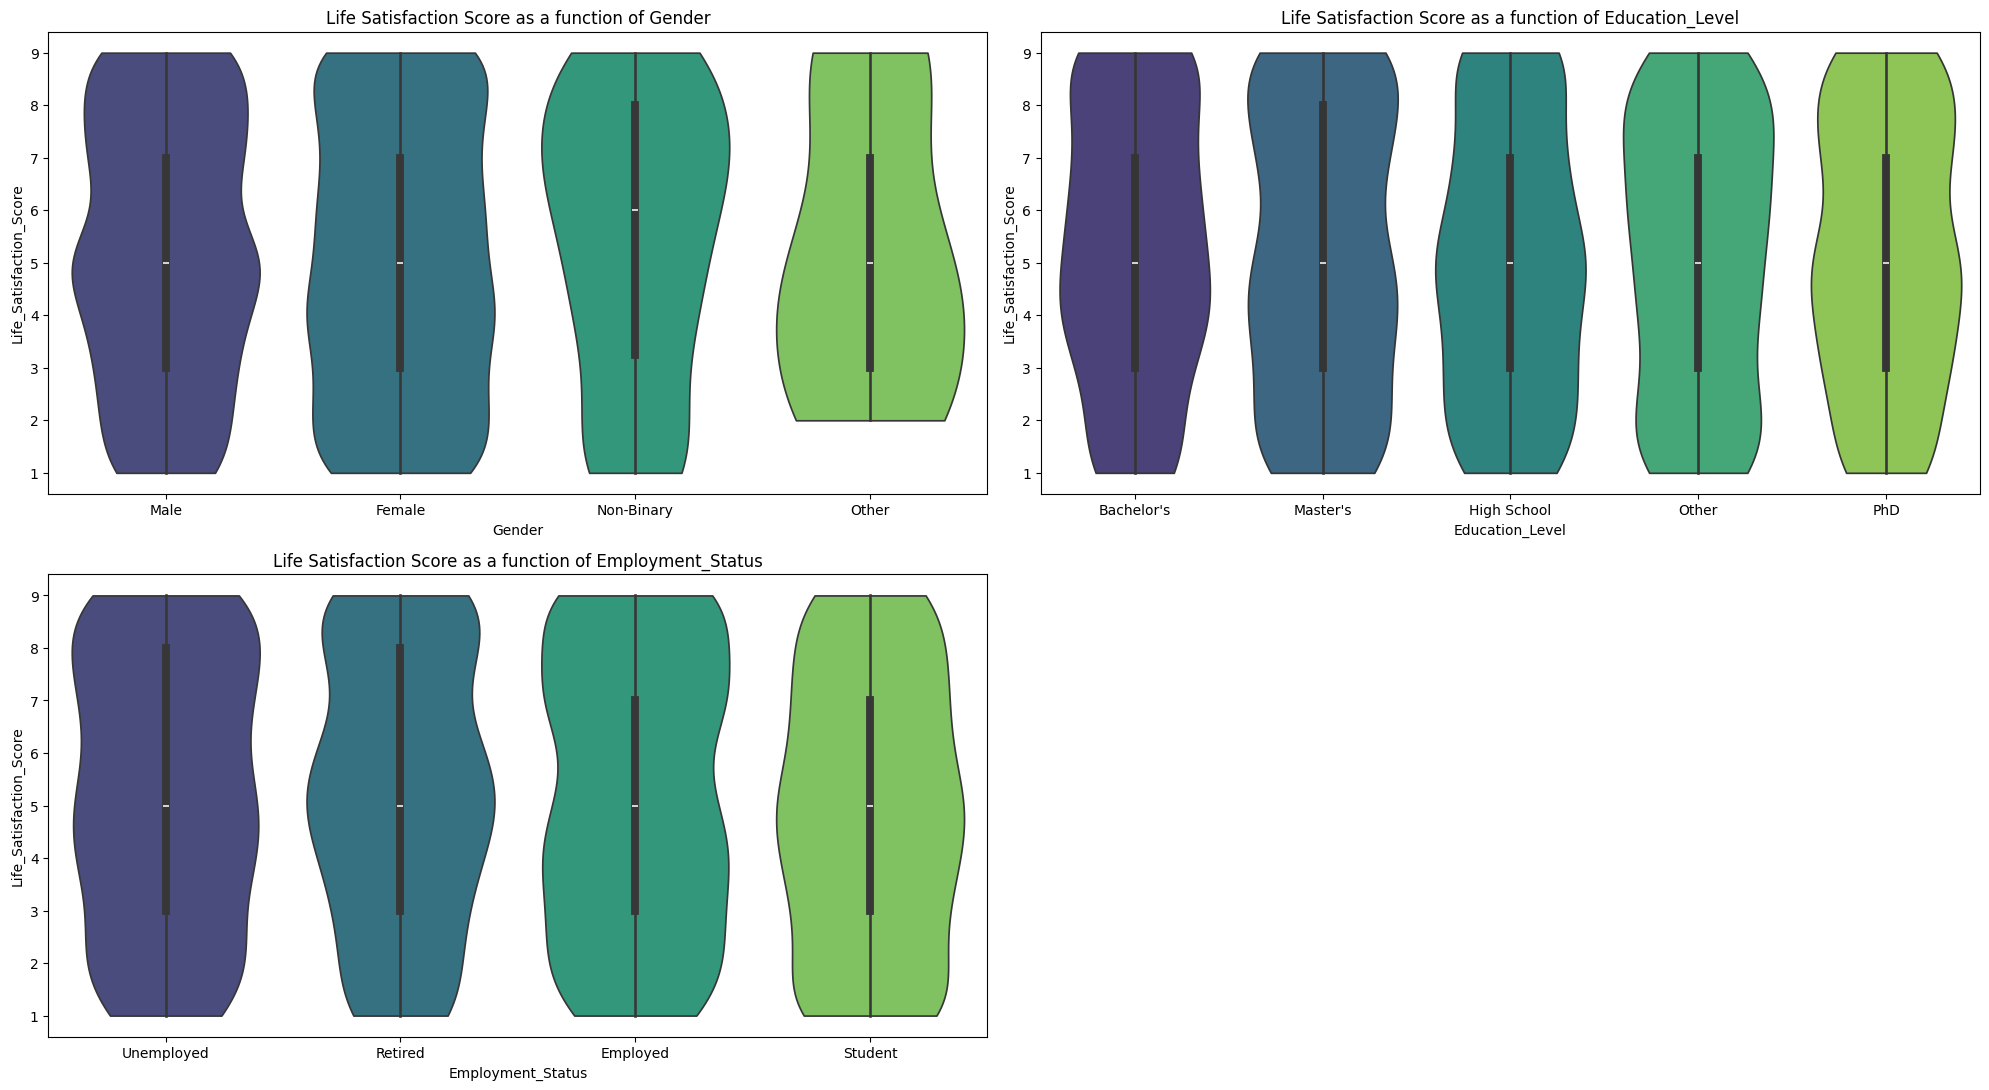

In [75]:
# plot Life Satisfication score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=col, y='Life_Satisfaction_Score', data=df,cut=0,palette='viridis')
    plt.title(f'Life Satisfaction Score as a function of {col}')
plt.tight_layout()
plt.show()

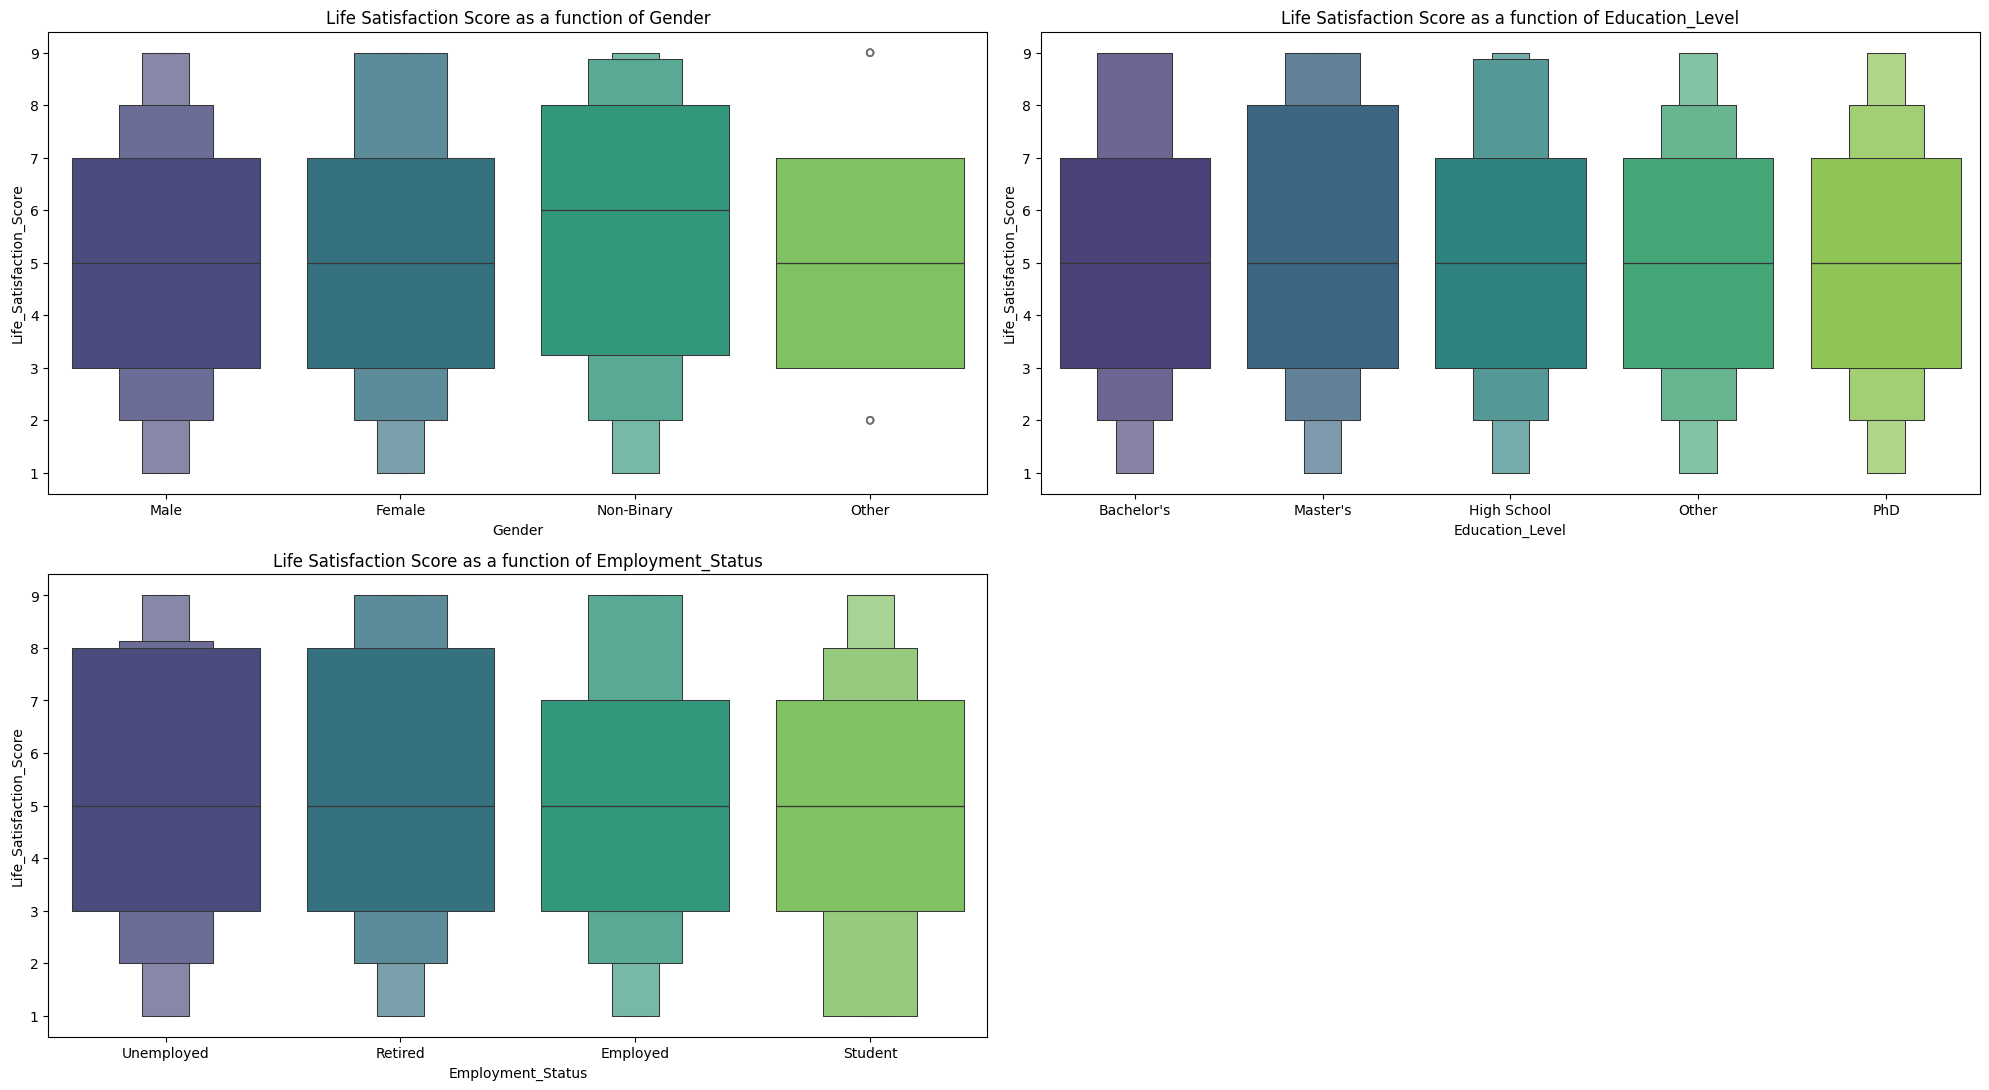

In [76]:
# plot Life Satisfication score as a function of categorical columns
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxenplot(x=col, y='Life_Satisfaction_Score', data=df,palette='viridis')
    plt.title(f'Life Satisfaction Score as a function of {col}')
plt.tight_layout()
plt.show()